# HW1 - EDA + PREPROCESSING - MIKOŁAJ GAŁKOWSKI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
data = pd.read_csv('dataset_diabetes/diabetic_data.csv')

### Shape of the data

In [3]:
print(data.shape)

(101766, 50)


### First look at the data

In [4]:
data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


**We can notice that some columns have '?', we can suppose that these are NULL values.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Columns decription (https://www.hindawi.com/journals/bmri/2014/781670/)

- **Encounter ID** Unique identifier of an encounter
- **Patient number** Unique identifier of a patient
- **Race** Values: Caucasian, Asian, African American, Hispanic, and other
- **Gender** Values: male, female, and unknown/invalid
- **Age** Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
- **Weight** Weight in pounds
- **Admission type** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
- **Discharge disposition** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
- **Admission source** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- **Time in hospital** Integer number of days between admission and discharge
- **Payer code** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
- **Medical specialty** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
- **Number of lab procedures** Number of lab tests performed during the encounter
- **Number of procedures** Numeric Number of procedures (other than lab tests) performed during the encounter
- **Number of medications** Number of distinct generic names administered during the encounter
- **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
- **Number of emergency visits** Number of emergency visits of the patient in the year preceding the encounter
- **Number of inpatient visits** Number of inpatient visits of the patient in the year preceding the encounter
- **Diagnosis 1** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- **Diagnosis 2** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- **Number of diagnoses** Number of diagnoses entered to the system 0%
- **Glucose serum test result** Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- **A1c test result** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
- **Change of medications** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
- **Diabetes medications** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
- **24 features for medications** For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
- **Readmitted** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

#### From the page linked above we can see that some columns have missing values, although they are not represented by NULL values which we could notice when we ran cell containing data.head(5).T.

**% missing**:
- Race - **2%**
- Weight - **97%**
- Payer code - **52%**
- Medical specialty - **53%**
- Diagnosis 3 - **1%**

**Our dependent value is column `readmitted`. Our explanatory variables would be all remaining columns excluding `encounter_id` and `patient_id`, because they are not giving us information about the patient.**

Let's drop columns `encounter_id` and `patient_nbr`.

In [7]:
data.drop(['encounter_id', 'patient_nbr'], inplace=True, axis=1)

Columns `admission_type_id`, `discharge_disposition_id`, `admission_source_id` need to be categorical, because they are representing different options.

In [8]:
data.admission_type_id = data.admission_type_id.astype('object')
data.discharge_disposition_id = data.discharge_disposition_id.astype('object')
data.admission_source_id = data.admission_source_id.astype('object')

data['admission_type_id'] = data['admission_type_id'].apply(str)
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(str)
data['admission_source_id'] = data['admission_source_id'].apply(str)

##### Let's check if some columns which have approximately 0% missing values have some NULL values.

In [9]:
for column in data.columns:
    if data[column].dtype == object:
         print(column, data[column][data[column] == '?'].count())

race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


**We can see that also diag_1 and diag_2 have some NULL values.**

In [10]:
data.race.value_counts().head(3)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Name: race, dtype: int64

In [11]:
data.weight.value_counts().head(2)

?           98569
[75-100)     1336
Name: weight, dtype: int64

In [12]:
data.payer_code.value_counts().head(2)

?     40256
MC    32439
Name: payer_code, dtype: int64

In [13]:
data.medical_specialty.value_counts().head(2)

?                   49949
InternalMedicine    14635
Name: medical_specialty, dtype: int64

In [14]:
data.diag_3.value_counts().head(2)                    

250    11555
401     8289
Name: diag_3, dtype: int64

In [15]:
data.diag_3[data.diag_3 == '?'].head(2)

0     ?
66    ?
Name: diag_3, dtype: object

**As we can see NULL values are represented by ?.**

**Let's replace them by np.nan, but we can drop weight column, because NULL values represents 97% of all values.**

In [16]:
data.drop('weight', inplace=True, axis=1)

In [17]:
data = data.replace('?', np.nan)

# EDA and feature engineering

## One-dimensional analysis

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


In [19]:
numeric_features = list(data.select_dtypes("int64").columns)
indexes_num_features = data.dtypes[data.dtypes!='object'].index
categorical_features = list(data.select_dtypes("object").columns)
print(f'numeric_features:\n{numeric_features}\nlength:{len(numeric_features)}\n\ncategorical_features:\n{categorical_features}\nlength:{len(categorical_features)}')

numeric_features:
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
length:8

categorical_features:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
length:39


In [20]:
skewed_features = data[indexes_num_features].skew().sort_values(ascending=False)
skewed_features

number_emergency      22.855582
number_outpatient      8.832959
number_inpatient       3.614139
num_medications        1.326672
num_procedures         1.316415
time_in_hospital       1.133999
num_lab_procedures    -0.236544
number_diagnoses      -0.876746
dtype: float64

`number_emergency`, `number_outpatient` and `number_inpatient` columns have high skewness, let's reduce it by transforming those columns using sqrt.

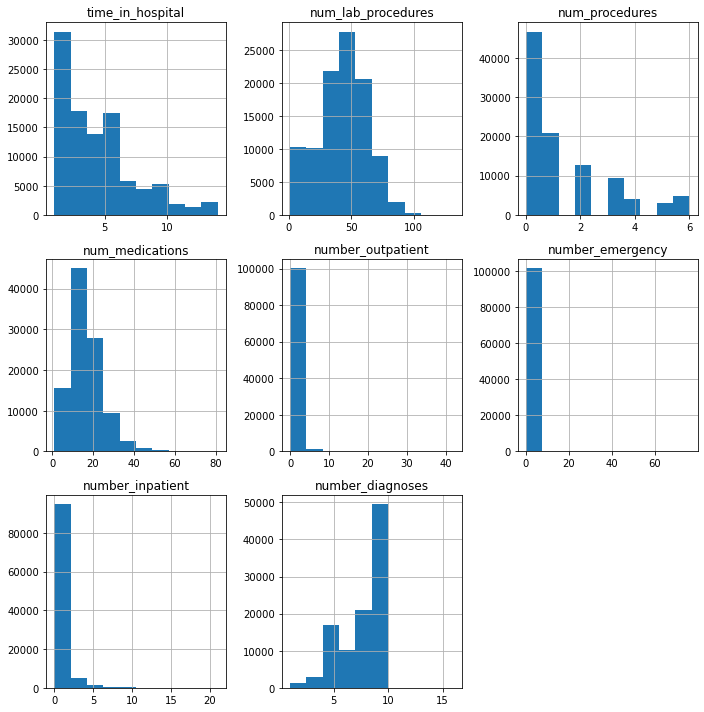

In [21]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].hist(ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

fig.tight_layout()

fig.delaxes(ax[2, 2])

plt.show()

In [22]:
data.number_emergency.skew()

22.855582151471214

In [23]:
data['number_emergency'] = np.sqrt(data['number_emergency'])

In [24]:
data.number_emergency.skew()

3.6796062463950276

In [25]:
data.number_outpatient.skew()

8.832958927156984

In [26]:
data['number_outpatient'] = np.sqrt(data['number_outpatient'])

In [27]:
data.number_outpatient.skew()

2.7391998067755163

In [28]:
data.number_inpatient.skew()

3.6141389923026286

In [29]:
data['number_inpatient'] = np.sqrt(data['number_inpatient'])

In [30]:
data.number_inpatient.skew()

1.300660695669053

For categorical variables let's count relative frequencies of values. 

In [31]:
for i in categorical_features:
    print('#####################')
    print(f'{i}\n{np.round((data[i].value_counts() / data[i].value_counts().sum()) * 100,2)}')
    print('#####################\n\n')

#####################
race
Caucasian          76.49
AfricanAmerican    19.31
Hispanic            2.05
Other               1.51
Asian               0.64
Name: race, dtype: float64
#####################


#####################
gender
Female             53.76
Male               46.24
Unknown/Invalid     0.00
Name: gender, dtype: float64
#####################


#####################
age
[70-80)     25.62
[60-70)     22.09
[50-60)     16.96
[80-90)     16.90
[40-50)      9.52
[30-40)      3.71
[90-100)     2.74
[20-30)      1.63
[10-20)      0.68
[0-10)       0.16
Name: age, dtype: float64
#####################


#####################
admission_type_id
1    53.05
3    18.54
2    18.16
6     5.20
5     4.70
8     0.31
7     0.02
4     0.01
Name: admission_type_id, dtype: float64
#####################


#####################
discharge_disposition_id
1     59.19
3     13.71
6     12.68
18     3.63
2      2.09
22     1.96
11     1.61
5      1.16
25     0.97
4      0.80
7      0.61
23     0.40
1

Let's check why in gender column there is 0% of Unknow/Invalid category.

In [32]:
data.gender[data.gender == 'Unknown/Invalid']

30506    Unknown/Invalid
75551    Unknown/Invalid
82573    Unknown/Invalid
Name: gender, dtype: object

There are 3 people which does not identify as a male/female, so let's remove these records just to simplify this column.

In [33]:
data.shape

(101766, 47)

In [34]:
data = data[data.gender != 'Unknown/Invalid']

In [35]:
data.shape

(101763, 47)

In [36]:
data.acetohexamide[data.acetohexamide == 'Steady']

26086    Steady
Name: acetohexamide, dtype: object

In [37]:
data.troglitazone[data.troglitazone == 'Steady']

61     Steady
63     Steady
121    Steady
Name: troglitazone, dtype: object

In [38]:
data['glimepiride-pioglitazone'][data['glimepiride-pioglitazone'] == 'Steady']

77130    Steady
Name: glimepiride-pioglitazone, dtype: object

In [39]:
data['metformin-rosiglitazone'][data['metformin-rosiglitazone'] == 'Steady']

86564    Steady
95470    Steady
Name: metformin-rosiglitazone, dtype: object

Columns: **acetohexamide**, **troglitazone**, **examide**, **citoglipton**, **glimepiride-pioglitazone**, **metformin-rosiglitazone**, **metformin-pioglitazone** does not give any addictional information so let's drop them.

In [40]:
columns_to_drop = ["acetohexamide", "troglitazone", "examide", "citoglipton", 
                   "glimepiride-pioglitazone", "metformin-rosiglitazone",
                   "metformin-pioglitazone"]

for column in columns_to_drop:
    data.drop(column, inplace=True, axis=1)

In [41]:
np.round(data.isnull().mean() * 100,3)

race                         2.232
gender                       0.000
age                          0.000
admission_type_id            0.000
discharge_disposition_id     0.000
admission_source_id          0.000
time_in_hospital             0.000
payer_code                  39.558
medical_specialty           49.082
num_lab_procedures           0.000
num_procedures               0.000
num_medications              0.000
number_outpatient            0.000
number_emergency             0.000
number_inpatient             0.000
diag_1                       0.021
diag_2                       0.352
diag_3                       1.398
number_diagnoses             0.000
max_glu_serum                0.000
A1Cresult                    0.000
metformin                    0.000
repaglinide                  0.000
nateglinide                  0.000
chlorpropamide               0.000
glimepiride                  0.000
glipizide                    0.000
glyburide                    0.000
tolbutamide         

In [42]:
data.payer_code.value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


We can drop rows which contains NULLS in **race**, **diag_1**, **diag_2**, **diag_3**, because it's a small percentage of all observations.

In [43]:
data = data[(data.race.notnull()) & (data.diag_1.notnull()) & (data.diag_2.notnull()) & (data.diag_3.notnull())]

In [44]:
np.round(data.isnull().mean() * 100, 3)

race                         0.000
gender                       0.000
age                          0.000
admission_type_id            0.000
discharge_disposition_id     0.000
admission_source_id          0.000
time_in_hospital             0.000
payer_code                  39.696
medical_specialty           49.278
num_lab_procedures           0.000
num_procedures               0.000
num_medications              0.000
number_outpatient            0.000
number_emergency             0.000
number_inpatient             0.000
diag_1                       0.000
diag_2                       0.000
diag_3                       0.000
number_diagnoses             0.000
max_glu_serum                0.000
A1Cresult                    0.000
metformin                    0.000
repaglinide                  0.000
nateglinide                  0.000
chlorpropamide               0.000
glimepiride                  0.000
glipizide                    0.000
glyburide                    0.000
tolbutamide         

Due to the fact that there are so many missing values in columns `payer_code` and `medical_specialty`, because there is not a perfect way how to impute those missing values.

In [45]:
data = data.drop(['payer_code', 'medical_specialty'], axis = 1)

#### Let's encode target value `readmitted`, let's simplify it to binary classification problem. When readmitted (1), when not (0).

In [46]:
data['readmitted'] = np.where(data['readmitted']=='NO', 0, 1)
data['readmitted'] = data['readmitted'].astype('int64')

In [47]:
numeric_features.append('readmitted')

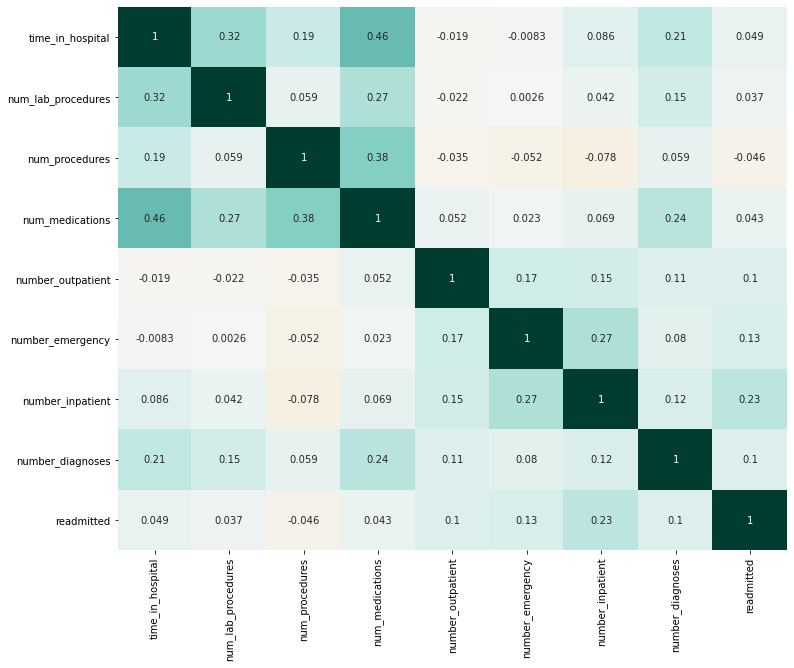

In [48]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[numeric_features].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG", cbar=False)
plt.show()

In [49]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

In [50]:
len(data.columns)

38

In [51]:
data.duplicated().sum()

0

## Two-dimensional analysis

From correlation matrix we can see that there might be some interesting correlations between `time_in_hospital` and `num_medications` / `num_lab_procedures` / `number_diagnoses`.

In [52]:
sns.set(rc={'figure.figsize':(16,12)})

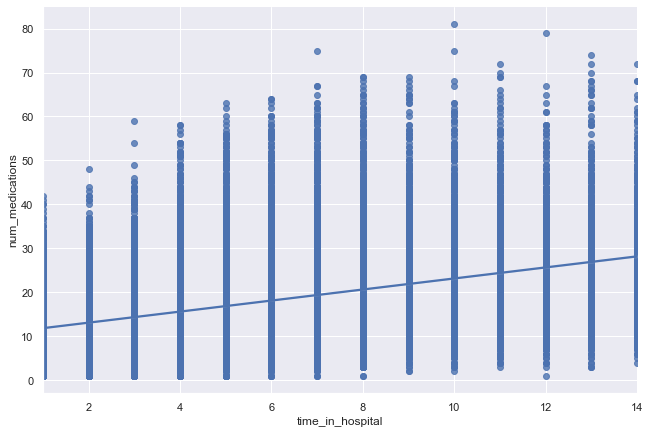

In [53]:
sns.lmplot(x = 'time_in_hospital', y = 'num_medications', data=data, height=6, aspect=1.5)
plt.show()

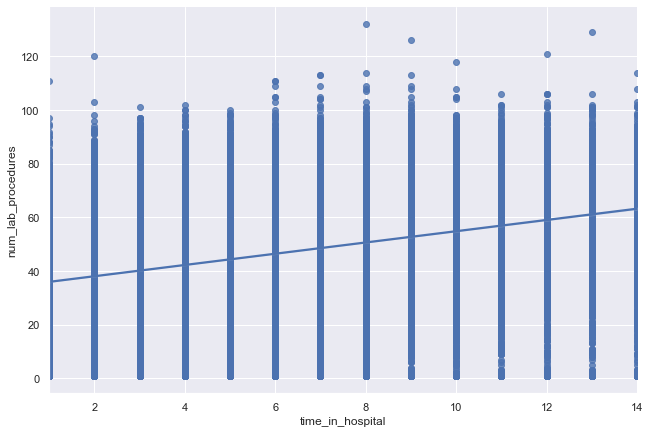

In [54]:
sns.lmplot(x = 'time_in_hospital', y = 'num_lab_procedures', data=data, height=6, aspect=1.5)
plt.show()

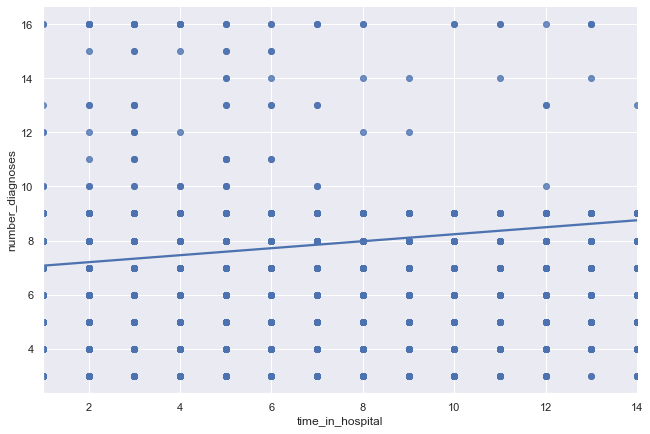

In [55]:
sns.lmplot(x = 'time_in_hospital', y = 'number_diagnoses', data=data, height=6, aspect=1.5)
plt.show()

As we can see, what\`s quite normal, as longer you stay in hospital, the more medications or lab procedures you might have. Also more diagnoses.

**Also let's check plot for `number_emergency` and `number_inpatient`.**

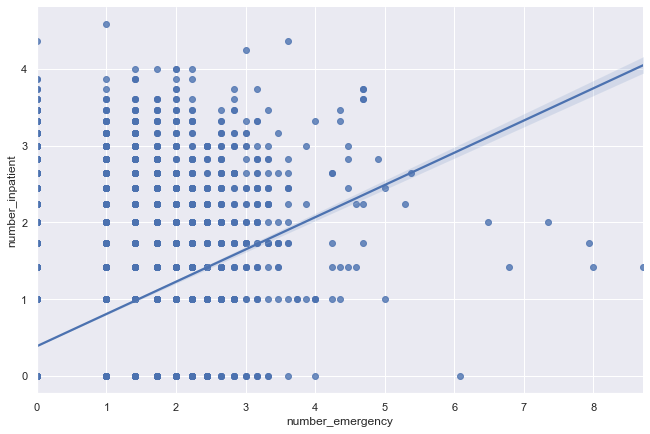

In [56]:
sns.lmplot(x = 'number_emergency', y = 'number_inpatient', data = data, height=6, aspect=1.5)
plt.show()

As we can see linear model does not represent well the correlation.

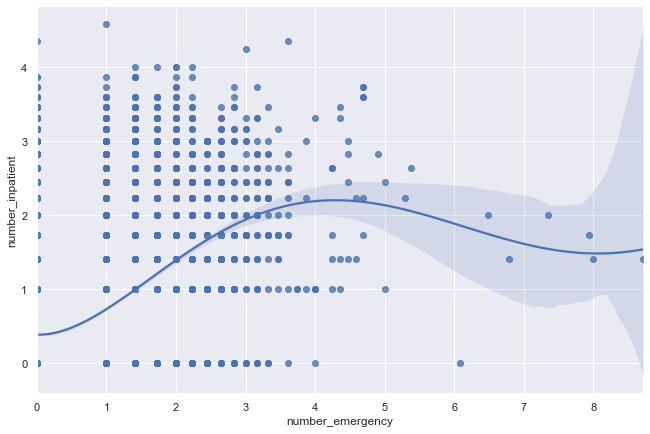

In [57]:
sns.lmplot(x = 'number_emergency', y = 'number_inpatient', data = data, order = 5, height=6, aspect=1.5)
plt.show()

It does look a lot better, as we can notice the more you have no. of emergency visits, the more you can land in hospital just by normal visit, but after some no. it does not matter.

#### Maybe now let's check whether gender, race or age has some correlation with time spent in hospitals.

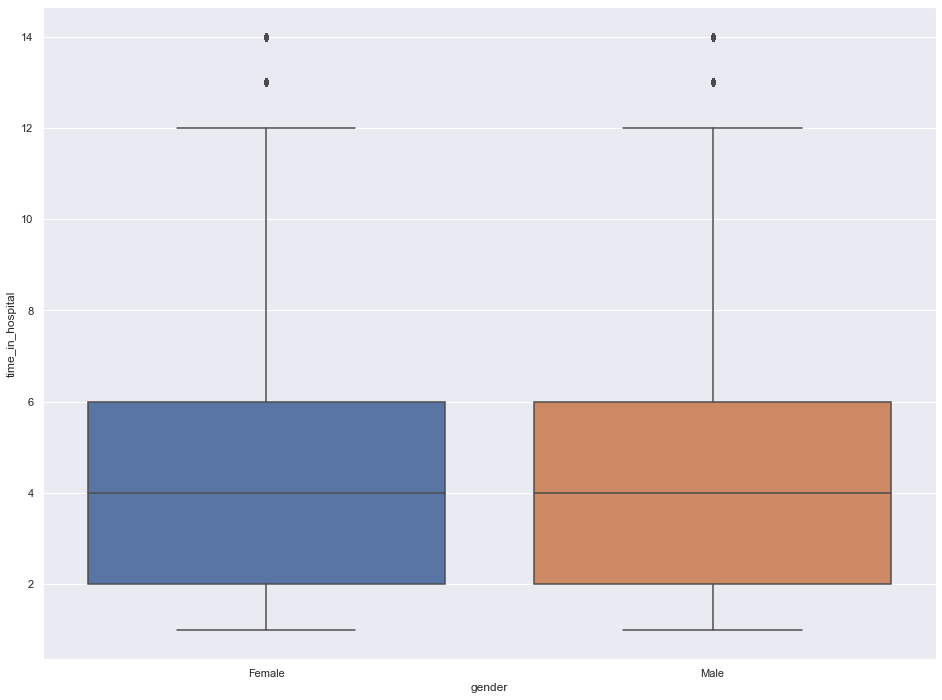

In [58]:
sns.boxplot(x="gender", y="time_in_hospital", data=data)
plt.show()

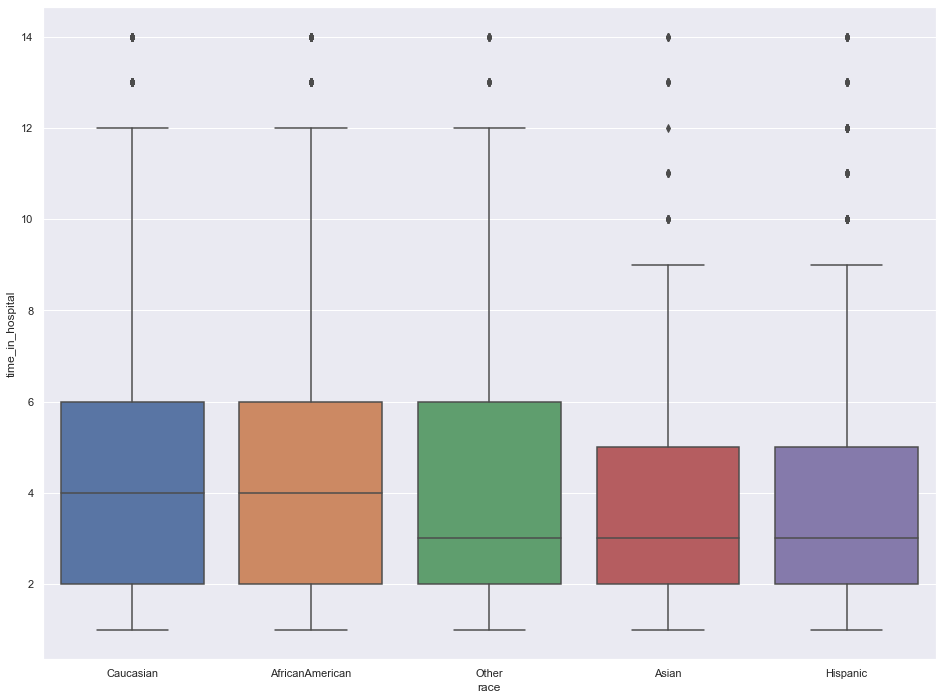

In [59]:
sns.boxplot(x="race", y="time_in_hospital", data=data)
plt.show()

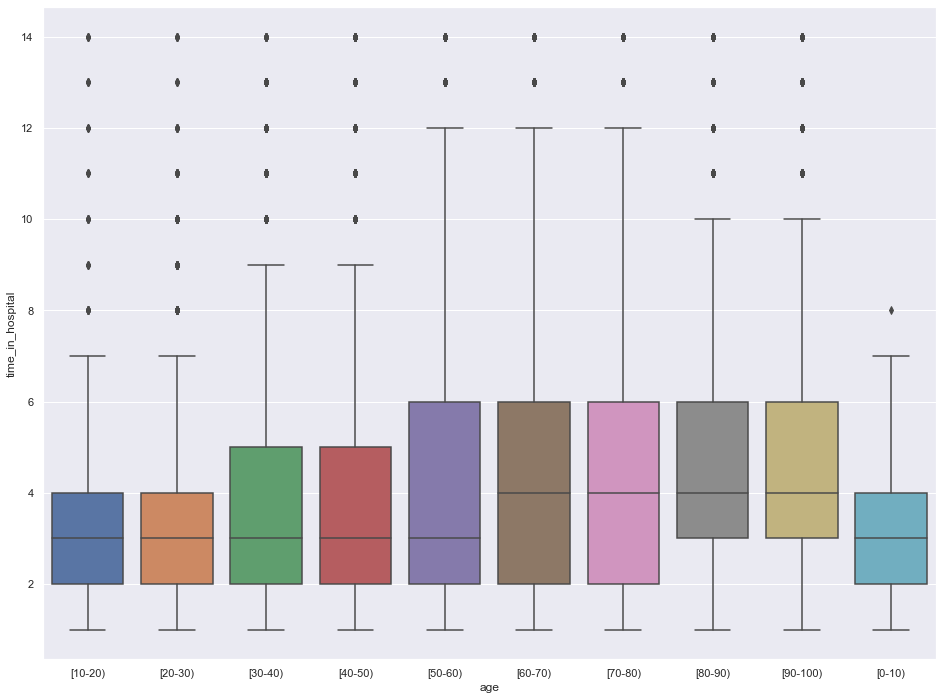

In [60]:
sns.boxplot(x="age", y="time_in_hospital", data=data)
plt.show()

The older you are, the longer you stay in hospital. Race and gender does not have any correlation.

### Handling Numeric Variables

In [61]:
numeric_features = list(data.select_dtypes("int64", exclude='object').columns)
numeric_features.remove('readmitted')
numeric_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses']

I decided to MinMax all numeric features, just to transform them, I am aware it might not be the best option and it might be worth checking if some of them have normal distribution to Standarize them. Dependently on the model we choose in the future it might work better on scaled or not scaled features.

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scalerMinMax = MinMaxScaler()

### Handling Categorical Variables

In [63]:
categorical_features = list(data.select_dtypes("object").columns)
print('length: ' + str(len(categorical_features)) + '\n')
categorical_features

length: 29



['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'change',
 'diabetesMed']

In [64]:
for i in categorical_features:
    print('#####################')
    print(f'{i}\n{data[i].value_counts()}')
    print('#####################\n\n')

#####################
race
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64
#####################


#####################
gender
Female    52833
Male      45219
Name: gender, dtype: int64
#####################


#####################
age
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64
#####################


#####################
admission_type_id
1    52178
3    18193
2    17543
6     5135
5     4661
8      312
7       20
4       10
Name: admission_type_id, dtype: int64
#####################


#####################
discharge_disposition_id
1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
11     1606
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15  

Columns `race`, `gender`, `admission_type_id`, `discharge_disposition_id`, `admission_source_id` ,`metformin`, `repaglinide`, `nateglinide`, `chlorpropamide`, `glimepiride`, `glipizide`, `glyburide`, `tolbutamide`, `pioglitazone`, `rosiglitazone`, `acarbose`, `miglitol`, `tolazamide`, `insulin`, `glyburide-metformin`, `glipizide-metformin`, `change`, `diabetesMed` need to be encoded using **OneHotEncoder**.

In [65]:
from sklearn.preprocessing import OneHotEncoder

hotenc = OneHotEncoder()

Column `age` we will also encode using **One Hot Encoder**, but firstly let's simplify those categories.

In [66]:
data.age = data.age.str.replace('[', '')
data.age = data.age.str.replace(')', '')
data.age = data.age.str.replace('-', ' ')
data.age = data.age.str.split(' ')

In [67]:
data.age = data.age.str[0]

In columns `diag_1`, `diag_2`, `diag_3` we need to decrease number of categories and then encode it using **One Hot Encoder**. Photo below shows how can we recognise which type of disease patient had.

![title](choroby.jpg)

### Decreasing number of categories

In [68]:
data.loc[(data.diag_1 >= '390') & (data.diag_1 <= "459"), 'diag_1'] = 'Circulatory'
data.loc[data.diag_1 == '785', 'diag_1'] = 'Circulatory'
data.loc[(data.diag_2 >= '390') & (data.diag_2 <= "459"), 'diag_2'] = 'Circulatory'
data.loc[data.diag_2 == '785', 'diag_2'] = 'Circulatory'
data.loc[(data.diag_3 >= '390') & (data.diag_3 <= "459"), 'diag_3'] = 'Circulatory'
data.loc[data.diag_3 == '785', 'diag_3'] = 'Circulatory'

data.loc[(data.diag_1 >= '460') & (data.diag_1 <= "519"), 'diag_1'] = 'Respiratory'
data.loc[data.diag_1 == '786', 'diag_1'] = 'Respiratory'
data.loc[(data.diag_2 >= '460') & (data.diag_2 <= "519"), 'diag_2'] = 'Respiratory'
data.loc[data.diag_2 == '786', 'diag_2'] = 'Respiratory'
data.loc[(data.diag_3 >= '460') & (data.diag_3 <= "519"), 'diag_3'] = 'Respiratory'
data.loc[data.diag_3 == '786', 'diag_3'] = 'Respiratory'

data.loc[(data.diag_1 >= '520') & (data.diag_1 <= "579"), 'diag_1'] = 'Digestive'
data.loc[data.diag_1 == '787', 'diag_1'] = 'Digestive'
data.loc[(data.diag_2 >= '520') & (data.diag_2 <= "579"), 'diag_2'] = 'Digestive'
data.loc[data.diag_2 == '787', 'diag_2'] = 'Digestive'
data.loc[(data.diag_3 >= '520') & (data.diag_3 <= "579"), 'diag_3'] = 'Digestive'
data.loc[data.diag_3 == '787', 'diag_3'] = 'Digestive'

data.loc[data.diag_1 == '250', 'diag_1'] = 'Diabetes'
data.loc[data.diag_2 == '250', 'diag_2'] = 'Diabetes'
data.loc[data.diag_3 == '250', 'diag_3'] = 'Diabetes'

data.loc[(data.diag_1 >= '800') & (data.diag_1 <= "999"), 'diag_1'] = 'Injury'
data.loc[(data.diag_2 >= '800') & (data.diag_2 <= "999"), 'diag_2'] = 'Injury'
data.loc[(data.diag_3 >= '800') & (data.diag_3 <= "999"), 'diag_3'] = 'Injury'

data.loc[(data.diag_1 >= '710') & (data.diag_1 <= "739"), 'diag_1'] = 'Musculoskeletal'
data.loc[(data.diag_2 >= '710') & (data.diag_2 <= "739"), 'diag_2'] = 'Musculoskeletal'
data.loc[(data.diag_3 >= '710') & (data.diag_3 <= "739"), 'diag_3'] = 'Musculoskeletal'

data.loc[(data.diag_1 >= '580') & (data.diag_1 <= "629"), 'diag_1'] = 'Genitourinary'
data.loc[(data.diag_2 >= '580') & (data.diag_2 <= "629"), 'diag_2'] = 'Genitourinary'
data.loc[(data.diag_3 >= '580') & (data.diag_3 <= "629"), 'diag_3'] = 'Genitourinary'
data.loc[data.diag_1 == '788', 'diag_1'] = 'Genitourinary'
data.loc[data.diag_2 == '788', 'diag_2'] = 'Genitourinary'
data.loc[data.diag_3 == '788', 'diag_3'] = 'Genitourinary'

data.loc[(data.diag_1 >= '140') & (data.diag_1 <= "279") & (data.diag_1 != '250'), 'diag_1'] = 'Neoplasms'
data.loc[(data.diag_2 >= '140') & (data.diag_2 <= "279") & (data.diag_2 != '250'), 'diag_2'] = 'Neoplasms'
data.loc[(data.diag_3 >= '140') & (data.diag_3 <= "279") & (data.diag_3 != '250'), 'diag_3'] = 'Neoplasms'
data.loc[(data.diag_1 == '780') | (data.diag_1 == '781') | (data.diag_1 == '784') | (data.diag_1 == '782'), 'diag_1'] = 'Neoplasms'
data.loc[(data.diag_2 == '780') | (data.diag_2 == '781') | (data.diag_2 == '784') | (data.diag_2 == '782'), 'diag_2'] = 'Neoplasms'
data.loc[(data.diag_3 == '780') | (data.diag_3 == '781') | (data.diag_3 == '784') | (data.diag_3 == '782'), 'diag_3'] = 'Neoplasms'
data.loc[(data.diag_1 >= '790') & (data.diag_1 <= "799"), 'diag_1'] = 'Neoplasms'
data.loc[(data.diag_2 >= '790') & (data.diag_2 <= "799"), 'diag_2'] = 'Neoplasms'
data.loc[(data.diag_3 >= '790') & (data.diag_3 <= "799"), 'diag_3'] = 'Neoplasms'
data.loc[(data.diag_1 >= '680') & (data.diag_1 <= "709"), 'diag_1'] = 'Neoplasms'
data.loc[(data.diag_2 >= '680') & (data.diag_2 <= "709"), 'diag_2'] = 'Neoplasms'
data.loc[(data.diag_3 >= '680') & (data.diag_3 <= "709"), 'diag_3'] = 'Neoplasms'
data.loc[(data.diag_1 >= '1') & (data.diag_1 <= "139"), 'diag_1'] = 'Neoplasms'
data.loc[(data.diag_2 >= '1') & (data.diag_2 <= "139"), 'diag_2'] = 'Neoplasms'
data.loc[(data.diag_3 >= '1') & (data.diag_3 <= "139"), 'diag_3'] = 'Neoplasms'

data.loc[(data.diag_1 >= '280') & (data.diag_1 <= "389"), 'diag_1'] = 'Other'
data.loc[(data.diag_2 >= '280') & (data.diag_2 <= "389"), 'diag_2'] = 'Other'
data.loc[(data.diag_3 >= '280') & (data.diag_3 <= "389"), 'diag_3'] = 'Other'
data.loc[(data.diag_1 >= '630') & (data.diag_1 <= "679"), 'diag_1'] = 'Other'
data.loc[(data.diag_2 >= '630') & (data.diag_2 <= "679"), 'diag_2'] = 'Other'
data.loc[(data.diag_3 >= '630') & (data.diag_3 <= "679"), 'diag_3'] = 'Other'
data.loc[(data.diag_1 >= '740') & (data.diag_1 <= "759"), 'diag_1'] = 'Other'
data.loc[(data.diag_2 >= '740') & (data.diag_2 <= "759"), 'diag_2'] = 'Other'
data.loc[(data.diag_3 >= '740') & (data.diag_3 <= "759"), 'diag_3'] = 'Other'
data.loc[data['diag_1'].str.contains('V'), 'diag_1'] = 'Other'
data.loc[data['diag_2'].str.contains('V'), 'diag_2'] = 'Other'
data.loc[data['diag_3'].str.contains('V'), 'diag_3'] = 'Other'
data.loc[data['diag_1'].str.contains('E'), 'diag_1'] = 'Other'
data.loc[data['diag_2'].str.contains('E'), 'diag_2'] = 'Other'
data.loc[data['diag_3'].str.contains('E'), 'diag_3'] = 'Other'

data.loc[(data.diag_1 != 'Circulatory') & (data.diag_1 != 'Respiratory') & (data.diag_1 != 'Digestive') & (data.diag_1 != 'Diabetes') &
        (data.diag_1 != 'Injury') & (data.diag_1 != 'Musculoskeletal') & (data.diag_1 != 'Genitourinary') & (data.diag_1 != 'Neoplasms'), 'diag_1'] = 'Other'
data.loc[(data.diag_2 != 'Circulatory') & (data.diag_2 != 'Respiratory') & (data.diag_2 != 'Digestive') & (data.diag_2 != 'Diabetes') &
        (data.diag_2 != 'Injury') & (data.diag_2 != 'Musculoskeletal') & (data.diag_2 != 'Genitourinary') & (data.diag_2 != 'Neoplasms'), 'diag_2'] = 'Other'
data.loc[(data.diag_3 != 'Circulatory') & (data.diag_3 != 'Respiratory') & (data.diag_3 != 'Digestive') & (data.diag_3 != 'Diabetes') &
        (data.diag_3 != 'Injury') & (data.diag_3 != 'Musculoskeletal') & (data.diag_3 != 'Genitourinary') & (data.diag_3 != 'Neoplasms'), 'diag_3'] = 'Other'

In [69]:
data.diag_1.value_counts()

Circulatory        29680
Neoplasms          18855
Respiratory        14035
Other               9542
Digestive           9252
Injury              6774
Genitourinary       4984
Musculoskeletal     4739
Diabetes             191
Name: diag_1, dtype: int64

In [70]:
data.diag_2.value_counts()

Circulatory        31570
Neoplasms          23405
Other              10662
Respiratory        10638
Genitourinary       8203
Diabetes            5412
Digestive           4090
Injury              2362
Musculoskeletal     1710
Name: diag_2, dtype: int64

In [71]:
data.diag_3.value_counts()

Circulatory        30364
Neoplasms          21766
Other              13312
Diabetes           11208
Respiratory         7204
Genitourinary       6527
Digestive           3892
Injury              1917
Musculoskeletal     1862
Name: diag_3, dtype: int64

Columns `max_glu_serum` and `A1Cresult` should be ecoded by **OrdinalEncoder**.

In [72]:
data.max_glu_serum.value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [73]:
data.A1Cresult.value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [74]:
categories_max_glu = ['None', 'Norm', '>200', '>300']
categories_A1Cresult = ['None', 'Norm', '>7', '>8']

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = [categories_max_glu, 
                                       categories_A1Cresult])

data[['max_glu_serum', 'A1Cresult']] = ord_enc.fit_transform(data[['max_glu_serum', 'A1Cresult']])

## Now let's finally transform all columns.

In [75]:
categorical_features.remove('max_glu_serum')
categorical_features.remove('A1Cresult')
print(len(categorical_features))

27


In [76]:
numeric_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses']

In [77]:
categorical_features

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'change',
 'diabetesMed']

In [78]:
for col in numeric_features:
    data[col] = scalerMinMax.fit_transform(data[[col]])
    
data = pd.get_dummies(data = data, columns=categorical_features)

# Final dataset prepared for the model.

In [79]:
data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.0,0.461538,0.0,0.0,...,0,1,0,0,1,0,1,0,0,1
2,0.076923,0.076336,0.833333,0.1500,1.414214,0.0,1.0,0.230769,0.0,0.0,...,0,1,0,0,1,0,0,1,0,1
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.0,0.307692,0.0,0.0,...,0,1,0,0,1,0,1,0,0,1
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.0,0.153846,0.0,0.0,...,0,1,0,0,1,0,1,0,0,1
5,0.153846,0.229008,1.000000,0.1875,0.000000,0.0,0.0,0.461538,0.0,0.0,...,0,1,0,0,1,0,0,1,0,1


In [80]:
data.shape

(98052, 169)